### Initial Parameters

In [57]:
FN = 'vocabulary-embedding'

In [58]:
vocab_size = 40000
seed = 73
embedding_dim = 300
lower = True

In [59]:
### Import a dataset
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

data_dir = './data/simpsons/full_dataset.txt'
text = helper.load_data(data_dir)
# Ignore notice, since we don't use it for analysing the data
text = text[:]

In [60]:
text = text.replace('"','')

In [61]:
view_sentence_range = (0, 10)


import numpy as np

print('Dataset Stats')
print('Roughly the number of unique words: {}'.format(len({word: None for word in text.split()})))
scenes = text.split('\n\n')
print('Number of scenes: {}'.format(len(scenes)))
sentence_count_scene = [scene.count('\n') for scene in scenes]
print('Average number of sentences in each scene: {}'.format(np.average(sentence_count_scene)))

sentences = [sentence for scene in scenes for sentence in scene.split('\n')]
print('Number of lines: {}'.format(len(sentences)))
word_count_sentence = [len(sentence.split()) for sentence in sentences]
print('Average number of words in each line: {}'.format(np.average(word_count_sentence)))

print()
print('The sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))

Dataset Stats
Roughly the number of unique words: 130863
Number of scenes: 1
Average number of sentences in each scene: 158271.0
Number of lines: 158272
Average number of words in each line: 11.6631684695
()
The sentences 0 to 10:
Miss Hoover: No, actually, it was a little of both. Sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it.
Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?
Miss Hoover: I don't know. Although I'd sure like to talk to him. He didn't touch my lesson plan. What did he teach you?
Lisa Simpson: That life is worth living.
Edna Krabappel-Flanders: The polls will be open from now until the end of recess. Now, (SOUR) just in case any of you have decided to put any thought into this, we'll have our final statements. Martin?
Martin Prince: (HOARSE WHISPER) I don't think there's anything left to say.
Edna Krabappel-Flanders: Bart?
Bart Simpson: Victory party under the slide!
(Apartment Building: Ext. apartm

In [62]:
sentences[:10]

["Miss Hoover: No, actually, it was a little of both. Sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it.",
 "Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?",
 "Miss Hoover: I don't know. Although I'd sure like to talk to him. He didn't touch my lesson plan. What did he teach you?",
 'Lisa Simpson: That life is worth living.',
 "Edna Krabappel-Flanders: The polls will be open from now until the end of recess. Now, (SOUR) just in case any of you have decided to put any thought into this, we'll have our final statements. Martin?",
 "Martin Prince: (HOARSE WHISPER) I don't think there's anything left to say.",
 'Edna Krabappel-Flanders: Bart?',
 'Bart Simpson: Victory party under the slide!',
 '(Apartment Building: Ext. apartment building - day)',
 'Lisa Simpson: (CALLING) Mr. Bergstrom! Mr. Bergstrom!']

In [63]:
from collections import Counter
from itertools import chain
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1]))
    return vocab, vocabcount

In [64]:
vocab, vocabcount = get_vocab(sentences)

In [65]:
list(vocab)

['Simpson:',
 'the',
 'I',
 'Homer',
 'a',
 'to',
 'you',
 '-',
 'of',
 'Marge',
 'Bart',
 'and',
 'Lisa',
 'in',
 'my',
 'is',
 'your',
 'that',
 'for',
 "I'm",
 'this',
 'have',
 'it',
 'be',
 'on',
 'You',
 'with',
 'me',
 'we',
 'just',
 'like',
 'was',
 'are',
 "don't",
 'And',
 'Oh,',
 'not',
 'all',
 'get',
 'do',
 'The',
 'at',
 'Well,',
 '/',
 'can',
 'int.',
 'what',
 'ext.',
 '(Simpson',
 'but',
 'day)',
 "It's",
 'got',
 'Int.',
 '--',
 'so',
 'But',
 'Burns:',
 'Montgomery',
 'C.',
 'one',
 'Home:',
 'out',
 "I'll",
 'Ext.',
 "it's",
 'know',
 "you're",
 'continuous)',
 'Moe',
 'What',
 'our',
 'about',
 'A',
 'Szyslak:',
 'Hey,',
 'house',
 'Skinner:',
 'if',
 'from',
 'little',
 'Flanders:',
 'up',
 'an',
 'gonna',
 'as',
 'Seymour',
 '(Springfield',
 'think',
 'This',
 "That's",
 'want',
 'Wiggum:',
 '(TO',
 'will',
 'he',
 "can't",
 'it.',
 'Van',
 "I've",
 'later)',
 'We',
 'Ned',
 'NOISE)',
 'Oh',
 'some',
 'Houten:',
 'Krusty',
 'you.',
 'go',
 'no',
 'could',
 'Now

In [66]:
# See the most popular tokens
print(vocab[:50])
print '...',len(vocab)

['Simpson:', 'the', 'I', 'Homer', 'a', 'to', 'you', '-', 'of', 'Marge', 'Bart', 'and', 'Lisa', 'in', 'my', 'is', 'your', 'that', 'for', "I'm", 'this', 'have', 'it', 'be', 'on', 'You', 'with', 'me', 'we', 'just', 'like', 'was', 'are', "don't", 'And', 'Oh,', 'not', 'all', 'get', 'do', 'The', 'at', 'Well,', '/', 'can', 'int.', 'what', 'ext.', '(Simpson', 'but']
... 130863


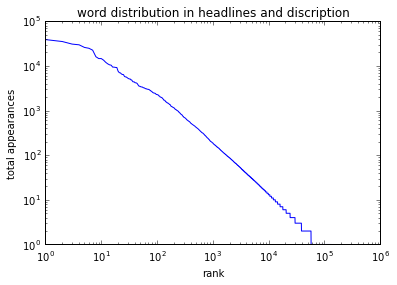

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([vocabcount[w] for w in list(vocab)]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');

### Index words

In [68]:
empty = 0 # RNN mask of no data
eos = 1  # end of sentence
start_idx = eos+1 # first real word

In [69]:
def get_idx(vocab, vocabcount):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>'] = empty
    word2idx['<eos>'] = eos
    
    idx2word = dict((idx,word) for word,idx in word2idx.iteritems())

    return word2idx, idx2word

In [70]:
word2idx, idx2word = get_idx(vocab, vocabcount)

In [71]:
word2idx

{'Fame.': 38518,
 'elf-self!': 57286,
 'gai': 57287,
 '(ANGUISHED': 1399,
 'Fame,': 57288,
 'Fame!': 57289,
 'woods': 3297,
 'Fame:': 38519,
 'spiders': 24136,
 'saxomophone': 57290,
 'hanging': 3353,
 "bringin'": 14398,
 'tow-headed': 127433,
 'disobeying': 38520,
 '(ANGUISHED)': 3860,
 'R.V.:': 38521,
 'LAST': 5768,
 'chatter': 22517,
 'course...': 29589,
 'SOLNECHN\xc4\xac': 57292,
 '(MARRIAGE': 57293,
 'cake,': 14920,
 'Sergeant.': 20499,
 'Sergeant,': 57295,
 'Fresh!': 31042,
 'Western': 7218,
 'wrought-iron': 57296,
 'wax,': 57297,
 'cake.': 3861,
 'undead.': 29590,
 'undead,': 38548,
 'Euro': 29591,
 'Eggplant-Xerxes-Crybaby-Overbite-Narwhal.': 124370,
 'wood!': 57299,
 'Crisscross.': 57300,
 'CORRIDOR': 22882,
 'spider!': 24138,
 'spider.': 57301,
 'doughy.': 106130,
 'Crisscross!': 24147,
 'Sucker...': 130127,
 'wood.': 24139,
 'ruffled!': 29593,
 'down?!': 55095,
 'SCARY)': 25943,
 'WATERMELON': 57304,
 "hangin'": 8753,
 'spider?': 57305,
 '(Bathroom': 38525,
 'bringing': 376

In [72]:
fname = 'glove.6B.%dd.txt'%embedding_dim
import os
datadir_base = os.path.expanduser(os.path.join('~', '.keras'))
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join('/tmp', '.keras')
datadir = os.path.join(datadir_base, 'datasets')
glove_name = os.path.join(datadir, fname)
if not os.path.exists(glove_name):
    path = 'glove.6B.zip'
    path = get_file(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")
    !unzip {datadir}/{path}

In [73]:
glove_name

'/Users/saracollins/.keras/datasets/glove.6B.300d.txt'

In [74]:
!wc -l {glove_name}

  400000 /Users/saracollins/.keras/datasets/glove.6B.300d.txt


In [75]:
glove_n_symbols = !wc -l {glove_name}
glove_n_symbols = int(glove_n_symbols[0].split()[0])
glove_n_symbols

400000

In [76]:
import numpy as np

In [77]:
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, embedding_dim))
globale_scale=.1
with open(glove_name, 'r') as fp:
    i = 0
    for l in fp:
        l = l.strip().split()
        w = l[0]
        glove_index_dict[w] = i
        glove_embedding_weights[i,:] = map(float,l[1:])
        i += 1
glove_embedding_weights *= globale_scale

In [131]:
#glove_embedding_weights[0,:]

In [79]:
glove_embedding_weights.std()

0.038177022350764936

In [84]:
for w,i in glove_index_dict.iteritems():
    w = w.lower()
    if w not in glove_index_dict:
        glove_index_dict[w] = i

In [85]:
import numpy as np

# generate random embedding with same scale as glove
np.random.seed(seed)
shape = (vocab_size, embedding_dim)
scale = glove_embedding_weights.std()*np.sqrt(12)/2 # uniform and not normal
embedding = np.random.uniform(low=-scale, high=scale, size=shape)
print 'random-embedding/glove scale', scale, 'std', embedding.std()

random-embedding/glove scale 0.0661245423932 std 0.038186561405


In [29]:
# copy from glove weights of words that appear in our short vocabulary (idx2word)
c = 0
for i in range(vocab_size):
    w = idx2word[i]
    g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is None and w.startswith('#'): # glove has no hastags (I think...)
        w = w[1:]
        g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is not None:
        embedding[i,:] = glove_embedding_weights[g,:]
        c+=1
print 'number of tokens, in small vocab, found in glove and copied to embedding', c,c/float(vocab_size)

number of tokens, in small vocab, found in glove and copied to embedding 16638 0.41595


In [30]:
glove_thr = 0.5

In [31]:
word2glove = {}
for w in word2idx:
    if w in glove_index_dict:
        g = w
    elif w.lower() in glove_index_dict:
        g = w.lower()
    elif w.startswith('#') and w[1:] in glove_index_dict:
        g = w[1:]
    elif w.startswith('#') and w[1:].lower() in glove_index_dict:
        g = w[1:].lower()
    else:
        continue
    word2glove[w] = g

In [32]:
normed_embedding = embedding/np.array([np.sqrt(np.dot(gweight,gweight)) for gweight in embedding])[:,None]

nb_unknown_words = 100

glove_match = []
for w,idx in word2idx.iteritems():
    if idx >= vocab_size-nb_unknown_words and w.isalpha() and w in word2glove:
        gidx = glove_index_dict[word2glove[w]]
        gweight = glove_embedding_weights[gidx,:].copy()
        # find row in embedding that has the highest cos score with gweight
        gweight /= np.sqrt(np.dot(gweight,gweight))
        score = np.dot(normed_embedding[:vocab_size-nb_unknown_words], gweight)
        while True:
            embedding_idx = score.argmax()
            s = score[embedding_idx]
            if s < glove_thr:
                break
            if idx2word[embedding_idx] in word2glove :
                glove_match.append((w, embedding_idx, s)) 
                break
            score[embedding_idx] = -1
glove_match.sort(key = lambda x: -x[2])
print '# of glove substitutes found', len(glove_match)

# of glove substitutes found 12585


In [33]:
for orig, sub, score in glove_match[-10:]:
    print score, orig,'=>', idx2word[sub]

0.500173492362 cheekbones => forehead
0.500173492362 Cheekbones => forehead
0.500160798114 challenger => opponent
0.500160798114 Challenger => opponent
0.500153473809 scorecard => scoreboard
0.500113721846 Blackberry => phones
0.500113721846 blackberry => phones
0.500093093124 doorman => bartender
0.500028082853 luscious => delicious
0.500027354362 Erosion => flooding


In [34]:
glove_idx2idx = dict((word2idx[w],embedding_idx) for  w, embedding_idx, _ in glove_match)

In [36]:
glove_idx2idx

{65537: 11755,
 51283: 39638,
 49153: 37571,
 114690: 35216,
 65552: 14593,
 65556: 7617,
 45828: 21579,
 65560: 12786,
 65569: 25584,
 98342: 21004,
 98347: 5774,
 98351: 12159,
 65592: 28511,
 65599: 23976,
 65608: 1868,
 65612: 2358,
 65614: 5228,
 65620: 17155,
 65622: 28355,
 76473: 25482,
 98399: 24186,
 65633: 14496,
 65634: 20539,
 98403: 8545,
 65636: 34049,
 65637: 33541,
 65640: 38539,
 98410: 17279,
 65651: 31689,
 98324: 22938,
 65665: 20779,
 120173: 29981,
 98455: 12806,
 65698: 24854,
 109254: 15922,
 65703: 24648,
 98473: 14151,
 65706: 10616,
 76487: 37946,
 87410: 27101,
 65711: 14152,
 98498: 11893,
 91219: 21151,
 98501: 34010,
 65737: 10389,
 65741: 6326,
 65743: 21732,
 98512: 36339,
 98519: 15176,
 65757: 3156,
 98530: 21333,
 54651: 19746,
 98534: 32045,
 65769: 20816,
 65770: 10148,
 65782: 10997,
 65784: 7689,
 65786: 10396,
 98563: 19200,
 98564: 6993,
 98571: 37596,
 98573: 3089,
 98574: 24229,
 98576: 8465,
 98580: 32141,
 65813: 36520,
 65818: 17386,
 658

### Import w2v 

In [41]:
import gensim

In [42]:
w2v_model = gensim.models.Word2Vec.load('/Users/saracollins/Downloads/simpsons_wv_model.wv')

In [53]:
w2v_model.wv.most_similar(positive=['homer', 'husband'], negative=['man'])

[(u'marge', 0.4773106575012207),
 (u'wife', 0.46615904569625854),
 (u'daughter', 0.45722299814224243),
 (u'homie', 0.4493201971054077),
 (u'bart', 0.43404772877693176),
 (u'lisa', 0.4193671643733978),
 (u'darling', 0.41821718215942383),
 (u'grampa', 0.40489649772644043),
 (u'sweetie', 0.39688271284103394),
 (u'father', 0.3959319591522217)]

In [54]:
# Ok, now do with this what was done with glove

In [90]:
w2v_vectors = w2v_model.wv

In [104]:
w2v_n_symbols = len(w2v_vectors.vocab)

In [106]:
w2v_index_dict = {}
w2v_embedding_weights = np.empty((glove_n_symbols, embedding_dim))
globale_scale=.1 # See if this is necessary.

In [132]:
i = 0
for l in w2v_vectors.index2word:
    w = l
    w2v_index_dict[w] = i
    vector_matrix = w2v_vectors.word_vec(w)
    w2v_embedding_weights[i,:] = map(float,vector_matrix[:])
    i += 1
w2v_embedding_weights *= globale_scale

In [133]:
w2v_embedding_weights.std()

0.0049125581526141904

In [134]:
for w,i in w2v_index_dict.iteritems():
    w = w.lower()
    if w not in w2v_index_dict:
        w2v_index_dict[w] = i

In [137]:
import numpy as np

# generate random embedding with same scale as glove
np.random.seed(seed)
shape = (vocab_size, embedding_dim)
scale = w2v_embedding_weights.std()*np.sqrt(12)/2 # uniform and not normal
embedding = np.random.uniform(low=-scale, high=scale, size=shape)
print 'random-embedding/glove scale', scale, 'std', embedding.std()

random-embedding/glove scale 0.00850880031546 std 0.00491378562285


In [139]:
#idx2word

In [140]:
# copy from glove weights of words that appear in our short vocabulary (idx2word)
c = 0
for i in range(vocab_size):
    w = idx2word[i]
    g = w2v_index_dict.get(w, w2v_index_dict.get(w.lower()))
    if g is None and w.startswith('#'): # glove has no hastags (I think...)
        w = w[1:]
        g = w2v_index_dict.get(w, w2v_index_dict.get(w.lower()))
    if g is not None:
        embedding[i,:] = w2v_embedding_weights[g,:]
        c+=1
print 'number of tokens, in small vocab, found in glove and copied to embedding', c,c/float(vocab_size)

number of tokens, in small vocab, found in glove and copied to embedding 14914 0.37285


In [142]:
w2v_thr = 0.5

In [143]:
word2w2v = {}
for w in word2idx:
    if w in w2v_index_dict:
        g = w
    elif w.lower() in w2v_index_dict:
        g = w.lower()
    elif w.startswith('#') and w[1:] in w2v_index_dict:
        g = w[1:]
    elif w.startswith('#') and w[1:].lower() in w2v_index_dict:
        g = w[1:].lower()
    else:
        continue
    word2w2v[w] = g

In [144]:
word2w2v

{'Allll': 'allll',
 'JOHNNY': 'johnny',
 'Poetry': 'poetry',
 'Larsen': 'larsen',
 'spiders': 'spiders',
 'hanging': 'hanging',
 'LAST': 'last',
 'chatter': 'chatter',
 'opener': 'opener',
 'Western': 'western',
 'Retreat': 'retreat',
 'Euro': 'euro',
 'Blade': 'blade',
 'WATERMELON': 'watermelon',
 'bringing': 'bringing',
 'wooded': 'wooded',
 'wooden': 'wooden',
 'Sack': 'sack',
 'woods': 'woods',
 'crotch': 'crotch',
 'HAPPENED': 'happened',
 'TRATTORIA': 'trattoria',
 'INTELLECTUAL': 'intellectual',
 'Honorable': 'honorable',
 'cooking': 'cooking',
 'Hamilton': 'hamilton',
 'replaced': 'replaced',
 'BIRD': 'bird',
 'Happening': 'happening',
 'Amuse': 'amuse',
 'brainwashed': 'brainwashed',
 'china': 'china',
 'wiseguy': 'wiseguy',
 'Manger': 'manger',
 'kids': 'kids',
 'climbed': 'climbed',
 'Ginger': 'ginger',
 'controversy': 'controversy',
 'BILLBOARD': 'billboard',
 'LAUGHTER': 'laughter',
 'Bullfighting': 'bullfighting',
 'Stand': 'stand',
 'golden': 'golden',
 'Dexter': 'dexte

In [145]:
normed_embedding = embedding/np.array([np.sqrt(np.dot(gweight,gweight)) for gweight in embedding])[:,None]

nb_unknown_words = 100

In [146]:
w2v_match = []
for w,idx in word2idx.iteritems():
    if idx >= vocab_size-nb_unknown_words and w.isalpha() and w in word2w2v:
        gidx = w2v_index_dict[word2w2v[w]]
        gweight = w2v_embedding_weights[gidx,:].copy()
        # find row in embedding that has the highest cos score with gweight
        gweight /= np.sqrt(np.dot(gweight,gweight))
        score = np.dot(normed_embedding[:vocab_size-nb_unknown_words], gweight)
        while True:
            embedding_idx = score.argmax()
            s = score[embedding_idx]
            if s < w2v_thr:
                break
            if idx2word[embedding_idx] in word2w2v :
                w2v_match.append((w, embedding_idx, s)) 
                break
            score[embedding_idx] = -1
w2v_match.sort(key = lambda x: -x[2])
print '# of w2v substitutes found', len(w2v_match)

# of glove substitutes found 8753


In [147]:
for orig, sub, score in w2v_match[-10:]:
    print score, orig,'=>', idx2word[sub]

0.505033136707 getcha => demonstrate
0.504894528088 VE => have
0.504894528088 ve => have
0.504732707271 TENDERLY => EYEING
0.504495012702 grounded => daredevil
0.503937076971 eyed => drunks
0.502878869612 corrected => disturbed
0.500818917963 rationalizing => Polo
0.50075193013 settling => penal
0.500738480197 Eduardo => Madam


In [148]:
w2v_idx2idx = dict((word2idx[w],embedding_idx) for  w, embedding_idx, _ in w2v_match)

In [151]:
# Translate this
Y = [[word2idx[token] for token in headline.split()] for headline in sentences]
len(Y)

158272

In [149]:
import cPickle as pickle
with open('data/%s.pkl'%FN,'wb') as fp:
    pickle.dump((embedding, idx2word, word2idx, w2v_idx2idx),fp,-1)

In [152]:
import cPickle as pickle
with open('data/%s.data.pkl'%FN,'wb') as fp:
    pickle.dump((Y),fp,-1)